<a href="https://colab.research.google.com/github/DangKhoa8422/ANN/blob/main/Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar10

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 
from keras.datasets import cifar10
#Load du lieu cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

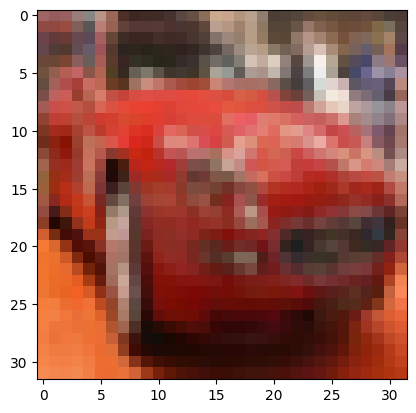

So: [1]


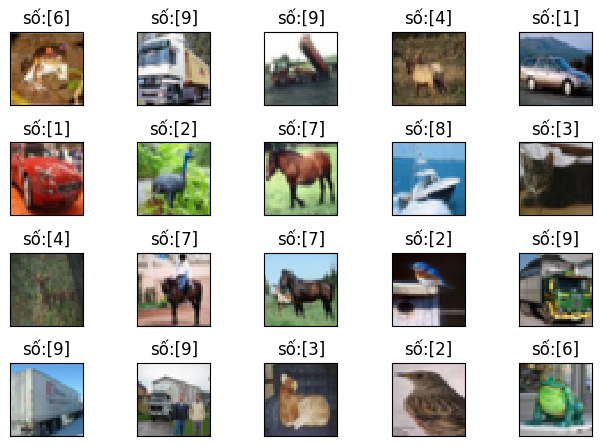

In [7]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

digit= x_train[5]
import matplotlib.pyplot as plt 
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('So:',y_train[5])
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', 
             interpolation = 'none')
  plt.title('số:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


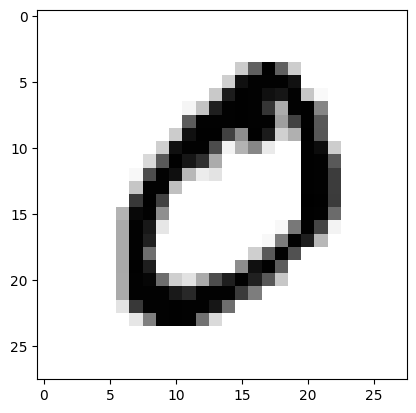

So: 0


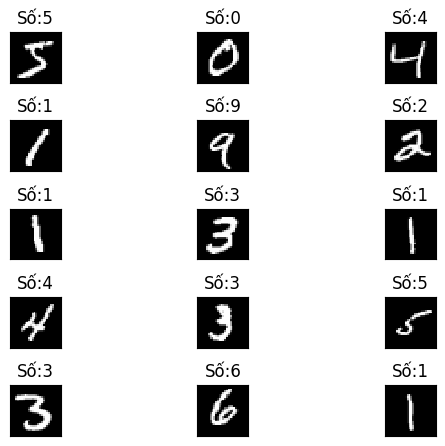

In [10]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images.shape
digit=train_images[1]
import matplotlib.pyplot as plt 
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('So:',train_labels[1])
for i in range(15):
  plt.subplot(5,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', 
             interpolation = 'none')
  plt.title('Số:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [26]:
#Xay dung mo hinh
model = Sequential()
#lop an thu 1
model.add(Dense(1024, activation ='relu', input_shape = (32*32*3,), name = 'layer1'))
#lop an thu 2
model.add(Dense(512,activation = 'relu', name = 'Layer2'))
#lop an thu 3
model.add(Dense(256,activation = 'relu', name = 'Layer3'))
#lop an thu 4
model.add(Dense(10, activation='softmax',name = 'Layer4'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1024)              3146752   
                                                                 
 Layer2 (Dense)              (None, 512)               524800    
                                                                 
 Layer3 (Dense)              (None, 256)               131328    
                                                                 
 Layer4 (Dense)              (None, 10)                2570      
                                                                 
Total params: 3,805,450
Trainable params: 3,805,450
Non-trainable params: 0
_________________________________________________________________


In [30]:
#Tien xu ly du lieu dau vao
x_train = x_train.reshape((50000,32*32*3)) # chia hinh anh 2D thanh 1D de khop voi input network
x_train= x_train.astype('float32')/255   # vi anh la cac day mau tu 0 den 255 nen phai chuyen thanh kieu so thuc 

x_test = x_test.reshape((10000, 32*32*3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [31]:
#Compile va huan luyen mo hinh voi epochs = 30
import keras.metrics as metrics 
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
391/391 [==============================] - 32s 79ms/step - loss: 2.0931 - accuracy: 0.2575
Epoch 2/30
391/391 [==============================] - 28s 71ms/step - loss: 1.7972 - accuracy: 0.3521
Epoch 3/30
391/391 [==============================] - 30s 76ms/step - loss: 1.6944 - accuracy: 0.3898
Epoch 4/30
391/391 [==============================] - 27s 69ms/step - loss: 1.6219 - accuracy: 0.4196
Epoch 5/30
391/391 [==============================] - 28s 70ms/step - loss: 1.5650 - accuracy: 0.4409
Epoch 6/30
391/391 [==============================] - 28s 70ms/step - loss: 1.5244 - accuracy: 0.4574
Epoch 7/30
391/391 [==============================] - 28s 71ms/step - loss: 1.4806 - accuracy: 0.4706
Epoch 8/30
391/391 [==============================] - 28s 71ms/step - loss: 1.4471 - accuracy: 0.4850
Epoch 9/30
391/391 [==============================] - 29s 73ms/step - loss: 1.4171 - accuracy: 0.4950
Epoch 10/30
391/391 [==============================] - 28s 71ms/step - loss: 1.382

1/1 [==============================] - 0s 84ms/step
This is airplane


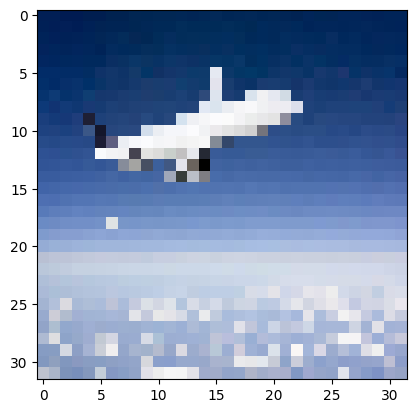

In [48]:
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#Du doan tren hinh anh moi
from keras.utils import load_img
from keras.utils.image_utils import img_to_array 
import numpy as np

url = 'plane.jpg'
img = load_img(url)
#plt.imshow(img)

img = load_img(url,target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
#img = img[:,:,0]
img = img.reshape((1,32*32*3))
img = img.astype('float32')/255
so = int(np.argmax(model.predict(img),axis =1))
print("This is",class_name[so])

In [33]:
#save
model.save('cifar_10.h')


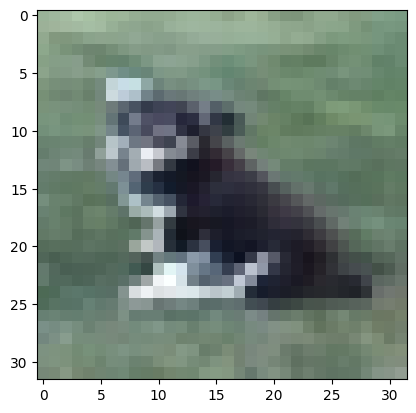

Vat nay la:  dog


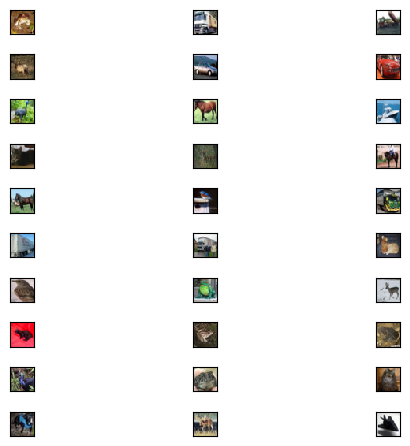

In [46]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
hinh = x_train[70]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
so_1 = y_train[70][0]
print('Vat nay la: ', class_name[so_1])
for i in range(30):
  plt.subplot(10,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', 
             interpolation = 'none')
  plt.xticks([])
  plt.yticks([])